In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
from PIL import Image
import pandas as pd
from IPython.display import display, HTML
import dataframe_image as dfi
import os
from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore") 

folder_path = './data/dermnet'

In [7]:
def files_in_directory(directory_path):
    return [file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))]

classes = os.listdir('./data/dermnet/train')    

class_counts = {
    "Labels":[],
    "NumTrain":[],
    "NumTest":[],
}

for label in classes:
    class_counts["NumTrain"].append(len(files_in_directory(folder_path + '/train/' + label)))
    class_counts["NumTest"].append(len(files_in_directory(folder_path + '/test/' + label)))
    class_counts["Labels"].append(label)

df = pd.DataFrame.from_dict(class_counts)

# display(HTML(df.to_html()))
# df_styled = df.style.background_gradient() 
# dfi.export(df_styled,"dermnet_classes.png")

print(tabulate(df,headers='keys', tablefmt="outline"))

+----+--------------------------------------------------------------------+------------+-----------+
|    | Labels                                                             |   NumTrain |   NumTest |
+====+====================================================================+============+===========+
|  0 | Acne and Rosacea Photos                                            |        840 |       312 |
|  1 | Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions |       1149 |       288 |
|  2 | Atopic Dermatitis Photos                                           |        489 |       123 |
|  3 | Bullous Disease Photos                                             |        448 |       113 |
|  4 | Cellulitis Impetigo and other Bacterial Infections                 |        288 |        73 |
|  5 | Eczema Photos                                                      |       1235 |       309 |
|  6 | Exanthems and Drug Eruptions                                       |        404 |   

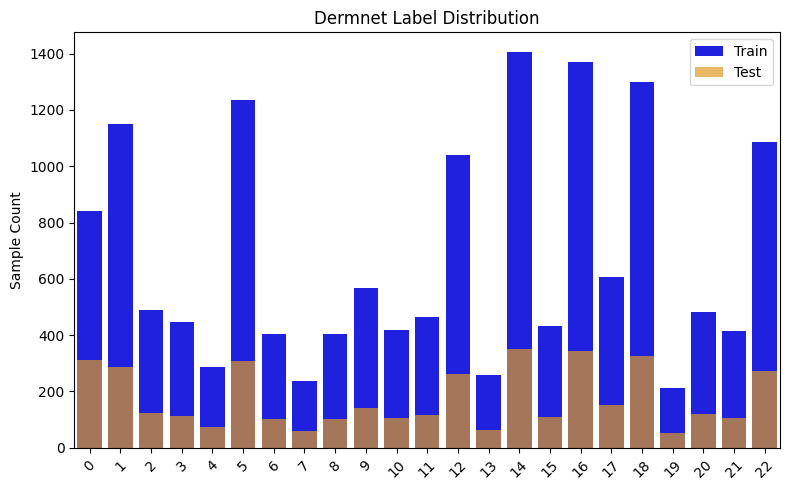

In [16]:
# Create histogram
plt.figure(figsize=(8, 5))
sns.barplot(x=range(23), y=class_counts["NumTrain"], color='blue', label='Train')
sns.barplot(x=range(23), y=class_counts["NumTest"], color='orange', label='Test', alpha=0.7)
plt.ylabel('Sample Count')
plt.title('Dermnet Label Distribution')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('histogram.png')

In [10]:
labels = ['Acne and Rosacea', 'Eczema', 'Hair Loss, Alopecia and other', 'Urticaria Hives']
sample_images = ['train/Acne and Rosacea Photos/07Acne081101.jpg', 'train/Eczema Photos/eczema-fingertips-134.jpg', 'train/Hair Loss Photos Alopecia and other Hair Diseases/alopecia-areata-97.jpg', 'train/Urticaria Hives/angioedema-26.jpg']

In [22]:
# Create collage
images = [cv2.imread('./data/dermnet/' + img) for img in sample_images]
for i in range(len(images)):
    images[i] = cv2.resize(images[i], (300, 300)) 

image_size = 300
# Add Labels
for i, img in enumerate(images):
    cv2.putText(img, labels[i], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

# Arrange in a grid with spacing
spacing = 20  # Adjust as needed
collage_width = 2 * image_size + spacing
collage_height = 2 * image_size + spacing
collage = np.ones((collage_height, collage_width, 3), dtype=np.uint8) * 255  # White background

positions = [(0, 0), (0, image_size + spacing), (image_size + spacing, 0), (image_size + spacing, image_size + spacing)]
for pos, img in zip(positions, images):
    collage[pos[0]:pos[0] + image_size, pos[1]:pos[1] + image_size, :] = img

# Save the collage
cv2.imwrite('collage.png', collage)

# Combine with histogram
hist_img = Image.open('histogram.png')
collage_img = Image.open('collage.png')

final_slide = Image.new('RGB', (max(hist_img.width, collage_img.width), hist_img.height + collage_img.height + spacing), (255, 255, 255))
final_slide.paste(hist_img, (0, 0))
final_slide.paste(collage_img, (0, hist_img.height + spacing))

final_slide.save('presentation_slide.png')

print("Presentation slide saved as 'presentation_slide.png'!")

Presentation slide saved as 'presentation_slide.png'!


In [52]:
ham10000_path = "./data/HAM10000"
df = pd.read_csv(ham10000_path + '/HAM10000_metadata')

datasets = ['vidir_modern', 'rosendahl', 'vienna_dias', 'vidir_molemax']
dx = ['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']
meaning_map = {
    "akiec": "Actinic keratoses and intraepithelial carcinoma / Bowen's disease",
    "bcc": "Basal cell carcinoma",
    "bkl": "Benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses)",
    "df": "Dermatofibroma",
    "mel": "Melanoma",
    "nv": "Melanocytic nevi",
    "vasc": "Vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage)"
}

+----+-------------+--------------+------+-----------+-------+-------+----------------+--------------+
|    | lesion_id   | image_id     | dx   | dx_type   |   age | sex   | localization   | dataset      |
+====+=============+==============+======+===========+=======+=======+================+==============+
|  0 | HAM_0000118 | ISIC_0027419 | bkl  | histo     |    80 | male  | scalp          | vidir_modern |
|  1 | HAM_0000118 | ISIC_0025030 | bkl  | histo     |    80 | male  | scalp          | vidir_modern |
|  2 | HAM_0002730 | ISIC_0026769 | bkl  | histo     |    80 | male  | scalp          | vidir_modern |
|  3 | HAM_0002730 | ISIC_0025661 | bkl  | histo     |    80 | male  | scalp          | vidir_modern |
|  4 | HAM_0001466 | ISIC_0031633 | bkl  | histo     |    75 | male  | ear            | vidir_modern |
|  5 | HAM_0001466 | ISIC_0027850 | bkl  | histo     |    75 | male  | ear            | vidir_modern |
|  6 | HAM_0002761 | ISIC_0029176 | bkl  | histo     |    60 | male  | fa

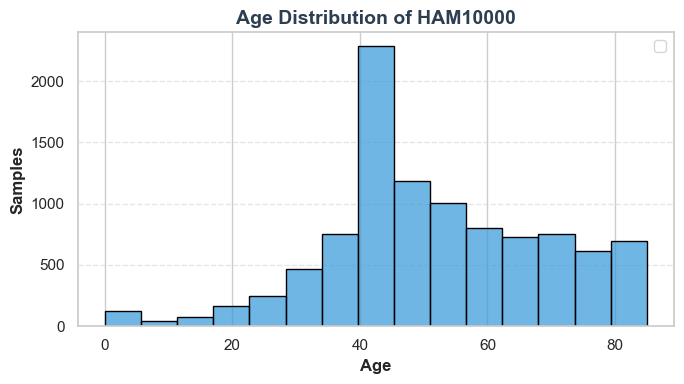

In [48]:
print(tabulate(df.head(7),headers='keys', tablefmt="outline"))

print("Total Images: ", 10000)
print("Unique Classes [dx]: " , dx)
print("Unique Datasets:" , datasets)
print("Maintining same 80:20 train-test split")


# Set Seaborn Theme
sns.set_theme(style="whitegrid")

# Create histogram plot
plt.figure(figsize=(7, 4))
sns.histplot(df['age'], bins=15, color='#3498db', alpha=0.7, edgecolor='black')

# Add labels & title
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Samples', fontsize=12, fontweight='bold')
plt.title('Age Distribution of HAM10000', fontsize=14, fontweight='bold', color='#2c3e50')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Save & Show
plt.tight_layout()
# plt.savefig('prettified_histogram.png', dpi=300)
plt.show()

In [50]:
class_counts = {
    "Labels":[],
    "NumSamples":[]
}

for key in meaning_map:
    class_counts["NumSamples"].append(df[df["dx"] == key].shape[0])
    class_counts["Labels"].append(meaning_map[key])

df = pd.DataFrame.from_dict(class_counts)

print(tabulate(df,headers='keys', tablefmt="outline"))

+----+----------------------------------------------------------------------------------------------------------+--------------+
|    | Labels                                                                                                   |   NumSamples |
+====+==========================================================================================================+==============+
|  0 | Actinic keratoses and intraepithelial carcinoma / Bowen's disease                                        |          327 |
|  1 | Basal cell carcinoma                                                                                     |          514 |
|  2 | Benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses) |         1099 |
|  3 | Dermatofibroma                                                                                           |          115 |
|  4 | Melanoma                                                                                  

In [54]:
labels = class_counts["Labels"]
sample_images = []
for key in meaning_map:
    sample_images.append(df[df["dx"] == key].iloc[0,1])

In [57]:
# Create collage
images = [cv2.imread('./data/HAM10000/images/' + img + '.jpg') for img in sample_images]
for i in range(len(images)):
    images[i] = cv2.resize(images[i], (300, 300)) 

image_size = 300
spacing = 20  # Space between images
rows, cols = 3, 3  # Grid layout (3x3)

# Add labels to images
for i, img in enumerate(images):
    cv2.putText(img, labels[i], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Compute collage size
collage_width = cols * image_size + (cols - 1) * spacing
collage_height = rows * image_size + (rows - 1) * spacing
collage = np.ones((collage_height, collage_width, 3), dtype=np.uint8) * 255  # White background

# Arrange images in grid with spacing
for i in range(len(images)):
    row = i // cols
    col = i % cols
    x = col * (image_size + spacing)
    y = row * (image_size + spacing)
    collage[y:y + image_size, x:x + image_size, :] = images[i]

# Save the collage
cv2.imwrite('collage.png', collage)

True

500